<a class='anchor' id='contents'></a>
# Example Profile Creation and Soil Profile Randomization

Created by KCK <br>
Created on 2020-05-11 <br>

### Contents:
**Part 1** : presents an example of how to build and calibrate your baseline/seed model profile from an input file.
* [Preamble](#preamble)
* [Build Material Database](#database)
* [Initialize Profile and Layers](#instantiate)
* [Assign Reference Data](#reference_data)
* [Calibrate Profile](#calibrate_profile)
* [Review Calibration Results](#preview_calibration)
* [Save Calibration Results](#save_calibration)

**Part 2** : deals with generating different profile realizations accounting for soil uncertainty from the seed profile.
* [Create Randomizations](#randomize_realiz)
* [Review Realization Results](#review_realiz)
* [Calibrate and Save Profile Realizations](#save_realiz)

---

In [2]:
# Import modules
import os, glob, copy, pickle
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import ModelLayer_rev02 as ml

## Part 1: Loading an Input File, Instantiating, and Calibrating a Baseline Profile


<a class='anchor' id='preamble'></a>
### __Preamble__

[back to top](#contents)

In [3]:
# Read input file for profile/layer instantiation
input_file_name  = "DEEPSOIL Input Profile.xlsx"
input_sheet_name = "Profile_0"
df = pd.read_excel(input_file_name,
                   sheet_name=input_sheet_name,
                   header=1)

# Output calibration filename
output_file_name = input_sheet_name + "_Baseline Profile DEEPSOIL Calibration.xlsx"

# Reference material path
reference_material_path = "Reference Material Data"

<a class='anchor' id='database'></a>
### __Build Reference Data__

Pulls reference data from .csv files stored in Reference Material Data folder. This discrete data is used to fit the GQ/H + MRDF model later on. Other models like Darendeli (2001) and Menq (2003) are coded in as functions instead. You can add your own discrete data, so long as you define rules for assignment to layers in *assign_reference_models()* fcn, with some basic stipulations about file naming.

[back to top](#contents)

In [4]:
# Create our material reference database
reference_database = ml.ModelLayer.create_reference_data(path=reference_material_path,
                                                         echo=False)

Created reference database.


<a class='anchor' id='instantiate'></a>
### __Profile/layer instantiation__ 
Instantiates a profile object with layer objects as children from an input dataframe. Each layer basically correspond to a line in the dataframe, with different columns corresponding to attributes. Methods are defined for calibrating each layer.

[back to top](#contents)

In [5]:
profile = ml.ModelProfile(df, echo=False)
print("Fundamental Period, Tn: {:2.2f}s""".format(profile.Tn()))

Instantiated a profile with 20 layers.
Fundamental Period, Tn: 0.32s


<a class='anchor' id='reference_data'></a>
### __Assign Reference Data/Models to Profile Layers__
Assign reference data and models to the profile layer instances. Valid models are listed below.

* *Seed and Idriss (1970)* for sand
* *Sy et. al (1991)* for sand or silt
* *Vucetic and Dobry (1991)* for clay
* *EPRI (1993)* for sand
* *Darendeli (2001)* for sand, silt, or clay
* *Menq (2003)* for granular materials > 0.3 mm

[back to top](#contents)

In [6]:
profile.assign_reference_models(reference_database)

Assigned reference data to 20 layers.


<a class='anchor' id='calibrate_profile'></a>
### __Calibrate Profile (GQH + MRDF Fitting)__
Calibrate the GQ/H + MRDF model for each layer based on the assigned reference data from the previous step. You can customize some default settings, and depth fitting intervals by specifying the *start_depth* and *end_depth* keywords too. To change the global curve fitting parameters, they can be accessed from the layer class. Default parameters are shown listed below.

    GQ/H fitting parameters:
    theta_LB    = [-10.0, -5.41, 0.2]
    theta_UB    = [ 0.75,  9.05, 0.99]
    theta_guess = [-0.25,  0.32, 0.7]

    MRDF fitting parameters:
    mrdf_LB     = [0.415,  0.1,   0.5]
    mrdf_UB     = [0.865,  0.95, 50.0]
    mrdf_guess  = [0.865,  0.4,   4.0]

[back to top](#contents)

In [7]:
# Standard fit
# profile.calibrate_profile(min_strain_perc_gqh=0.0001,
#                           max_strain_perc_gqh=0.5,
#                           min_strain_perc_mrdf=0.005,
#                           start_depth=-np.Inf,
#                           end_depth=np.Inf,
#                           echo=False)

# Alternative fit
profile.calibrate_profile(min_strain_perc_gqh=0.0001,
                          max_strain_perc_gqh=0.15,
                          min_strain_perc_mrdf=0.1,
                          start_depth=-np.Inf,
                          end_depth=np.Inf,
                          echo=False)

Profile calibration complete. Calibrated 19 layers.


<a class='anchor' id='preview_calibration'></a>
### __Review Profile Calibration Results__
You can call matrix plot previews to review calibration results (G/Gmax, damping, or hysteretic curves generated for different strain levels) quickly.

[back to top](#contents)

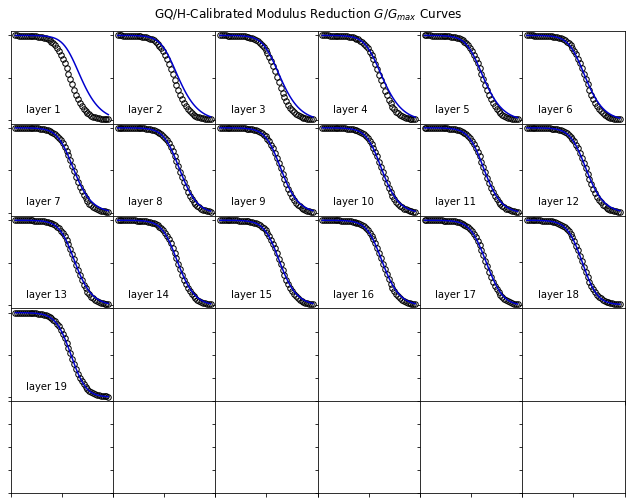

In [11]:
profile.preview_GQH_calibration()

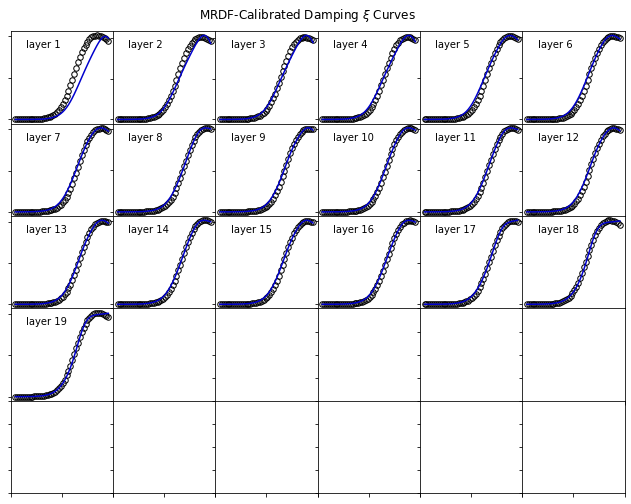

In [12]:
profile.preview_MRDF_calibration()

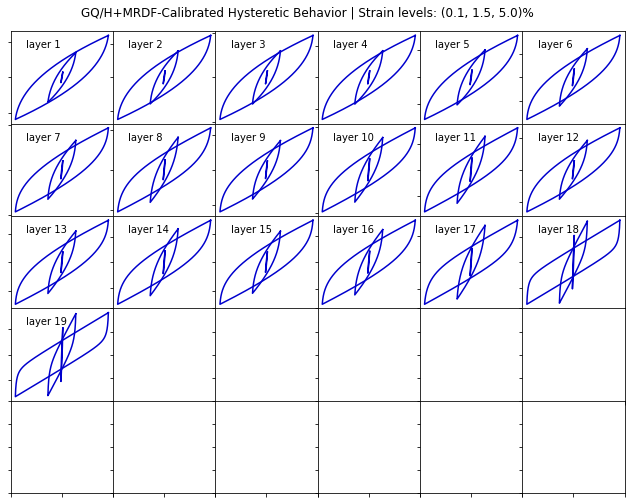

In [13]:
profile.preview_hysteretic_calibration(strain_levels_perc=(0.1,1.5,5.0))

<a class='anchor' id='save_calibration'></a>
### __Save Profile Calibration Results__
You can save calibration results to an excel file. This file can subsequently be used to generate/seed the DEEPSOIL input file, or you can generate the file directly from a profile class instance.

[back to top](#contents)

In [14]:
profile.save_calibration_results(output_file_name)

Profile calibration saved: Profile_0_Baseline Profile DEEPSOIL Calibration.xlsx


,Layer Number,Layer_Name,Thickness (m),Unit Weight (KN/m^3),Shear Wave Velocity (m/s),Shear Strength (kPa),Dmin (%),theta1,theta2,theta3,theta4,theta5,p1,p2,p3
0,1,FILL/SILTY SAND,0.46,17.000000,53.5,60.0,2.0,-10.000000,-5.410000,1.0,1.0,0.200000,0.865000,0.950000,27.402123
1,2,SILTY CLAY (CL),0.54,17.214484,107.0,120.0,2.0,-10.000000,-5.410000,1.0,1.0,0.200000,0.865000,0.887359,29.898002
2,3,SILTY CLAY (CL),0.50,17.677593,132.0,180.0,2.0,-10.000000,-5.410000,1.0,1.0,0.200000,0.865000,0.817976,28.878531
3,4,SILTY CLAY (CL),0.50,18.074762,157.0,252.0,2.0,-10.000000,-5.410000,1.0,1.0,0.200000,0.865000,0.758662,27.740975
4,5,SILTY CLAY (CL),0.50,18.447503,184.0,276.0,2.0,-10.000000,-5.410000,1.0,1.0,0.493085,0.847424,0.555337,23.549448
5,6,SILTY CLAY (CL),0.55,18.767174,210.0,276.0,2.0,-7.314288,-5.410000,1.0,1.0,0.741789,0.781622,0.472608,25.502460
6,7,SILTY CLAY (CI),0.45,18.953982,226.0,276.0,2.0,-5.937333,-5.410000,1.0,1.0,0.872658,0.741200,0.438540,28.273815
7,8,SILTY CLAY (CI),0.50,17.526521,232.0,252.0,2.0,-2.652378,-0.876443,1.0,1.0,0.990000,0.688556,0.367232,16.082217
8,9,SILTY CLAY (CI),0.57,16.874382,173.0,180.0,2.0,-4.356766,-4.934562,1.0,1.0,0.990000,0.687004,0.454609,36.277759
9,10,CLAY (CH),0.43,16.986272,183.0,120.0,2.0,-2.910467,-2.771648,1.0,1.0,0.990000,0.664808,0.358238,24.795322


<a class='anchor' id='save_calibration'></a>
### __Generate a DEEPSOIL Input Profile__
Generate a DEEPSOIL input file. THE DEPSOIL file is basically text file with .dp extention with tagged fields. Below we generate it directly from our baseline profile instance.

[back to top](#contents)

In [15]:
profile.create_deepsoil_profile(echo=False,DS_output_fname="DeepSoil_Input_"+input_sheet_name)

DEEPSOIL Input profile created: C:\Users\kkuei\Desktop\DEEPSOIL MRD Calibration Example\DEEPSOIL Input Profiles\DeepSoil_Input_Profile_0.dp


## Part 2: Creating Randomizations from our Baseline Profile

<a class='anchor' id='preamble'></a>
### __Create Randomizations__
Create profile *N* randomizations from our baseline/seed profile. We can randomize based on layer thickness, Vs, shear strength, modulus reduction and damping curves. 

* Toro et al. (1995) is used for layer thickness and Vs randomization. 
* Shear strength is randomized based on the specified COV in the input file.
* Darendeli (2001) is used for randomizing G/Gmax and damping curves with bounding limits as suggested by Rathje et al. (2010).

[back to top](#contents)

In [20]:
# Specify realization parameters

N_realiz = 800     # Number of realizations
seed = 10005       # Random seed number (for predictability)

# ..Primary Toro (1995) parameters
toro_sigma_ln_Vs = 0.04                   # For Vs (0.15 for site-specific normally)
toro_sigma_ln_thickness = 0.0             # For layer thickness (0.3 for site-specific normally)
toro_use_thickness_randomization = True   # Must be True for layer thickness randomization
toro_use_site_specific_sigma = False      # For the depth-dependent option (assigns recommended profile)

# ..Primary Darendeli (2001) params
mrd_sigma1 = 1.0     # sigma for MR
mrd_sigma2 = 1.0     # sigma for damping
mrd_rho_DNG = -0.5   # strain-dependent correlation coefficient (recomended by Rathje et al. 2010)
                     # negative values means increasing G/Gmax decreases Damping
MR_min = 0.0001      # min. limit for G/Gmax
MR_max = 1.0         # max. limit for G/Gmax
damp_min = 0.1       # min. limit for damping (%)
damp_max = 50        # max. limit for damping (%)


# Generate realizations
realdat = ml.randomize_from_seed_profile(profile,N_realiz=N_realiz,seed=seed,
                                        toro_sigma_ln_Vs=toro_sigma_ln_Vs,
                                        toro_sigma_ln_thickness=toro_sigma_ln_thickness,
                                        toro_use_thickness_randomization=toro_use_thickness_randomization,
                                        toro_use_site_specific_sigma=toro_use_site_specific_sigma,
                                        mrd_sigma1=mrd_sigma1,mrd_sigma2=mrd_sigma2,mrd_rho_DNG=mrd_rho_DNG,
                                        MR_min=MR_min,MR_max=MR_max,damp_min=damp_min,damp_max=damp_max)

# Unpack tuple
realizations, dat_Vs_rand, dat_MRD_rand  = realdat[0], realdat[1], realdat[2]

<a class='anchor' id='review_realiz'></a>
### __Review Randomizations__
Preview our randomizations for profile layer thickness and Vs, and shear strength, as well as for modulus and damping curves of individual layers for each profile realization.

[back to top](#contents)

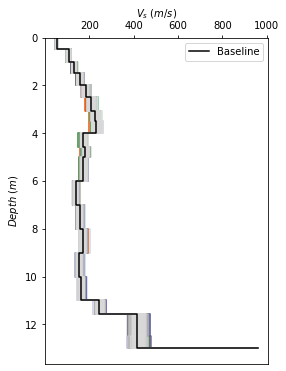

In [21]:
ml.plot_Vs_randomization(profile,realizations)

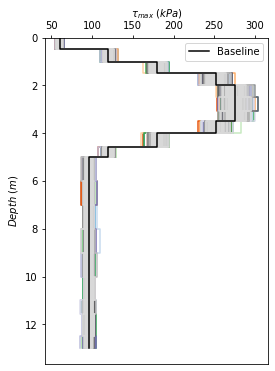

In [22]:
ml.plot_shear_randomization(profile,realizations)

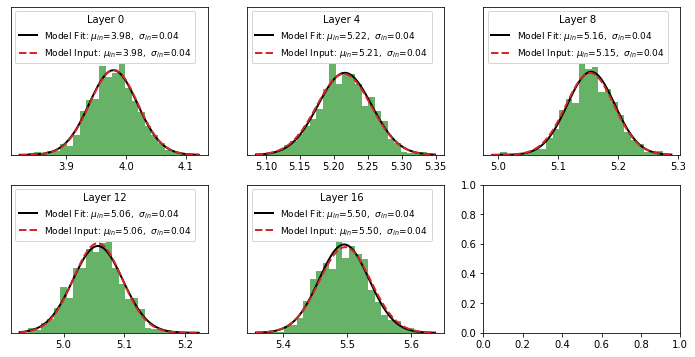

In [23]:
ml.plot_lnVs_distribution(dat_Vs_rand,plot_nlayer=5,ncol=3,figsize=(12,6),fs=9)

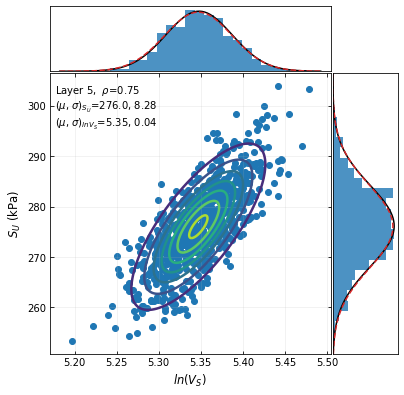

In [24]:
ml.plot_joint_lnVs_shear_dist(dat_Vs_rand,idx=5)

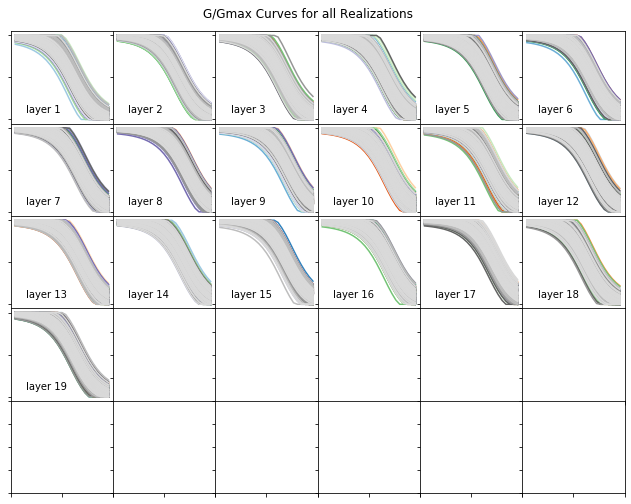

In [25]:
ml.preview_modulus_randomization(profile,realizations,dat_MRD_rand)

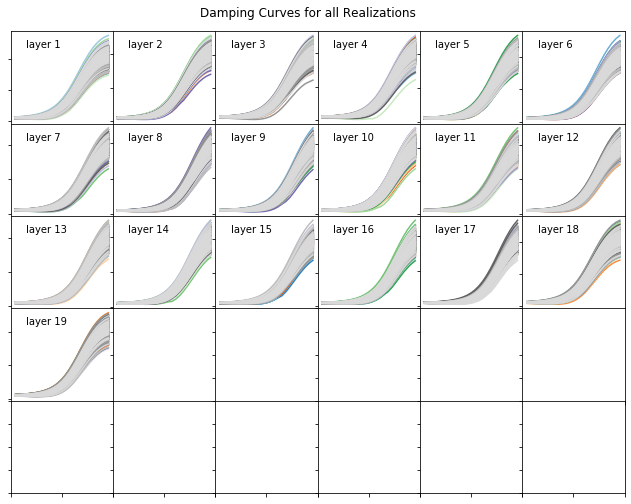

In [26]:
ml.preview_damping_randomization(profile,realizations,dat_MRD_rand)

In [32]:
fname='data.pkl'
with open(fname,'wb') as f:
    pickle.dump(realizations,f,protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
with open(fname,'rb') as f:
    realizations = pickle.load(f)

<a class='anchor' id='save_realiz'></a>
### __Calibrate and Save Randomizations__
If we're satisfied with the level of uncertainty that we're modelling, then we can calibrate our models and generate our DEEPSOIL profiles. 

Comment/uncomment the .preview_ and .save_ calls if you want it to save the profiles faster/slower.

[back to top](#contents)

Profile calibration complete. Calibrated 19 layers.
Profile calibration saved: Calibration_Results_Realization_0.xlsx
DEEPSOIL Input profile created: C:\Users\kkuei\Dropbox\Numerical Modelling\Work From Home\Victoria\_Modelling\GQH MRDF Calibration and Randomization\DEEPSOIL Input Profiles\Realization_0.dp


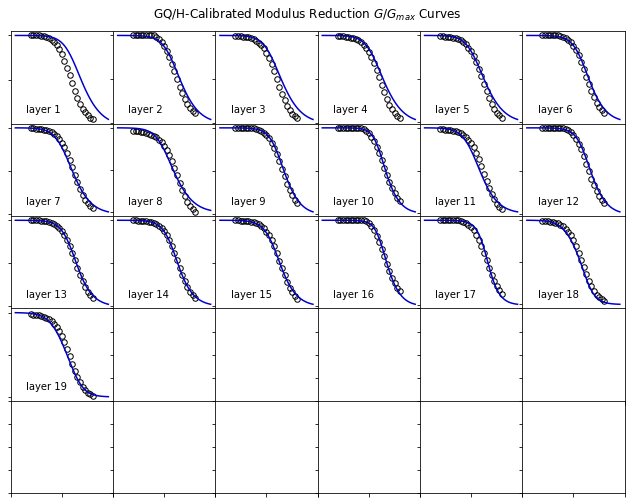

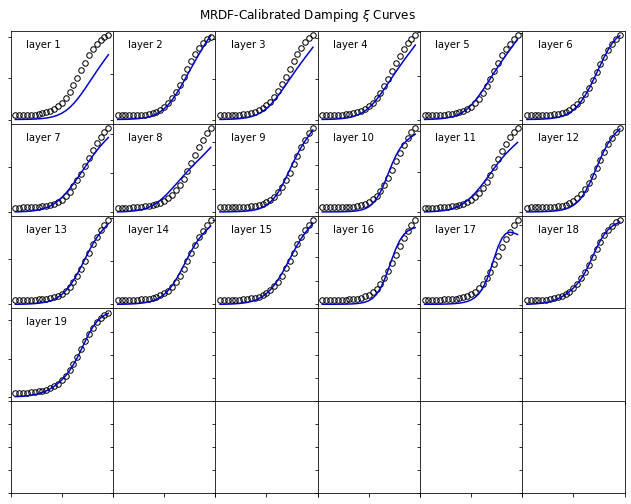

In [34]:
start_idx = 0
end_idx = -1
#plt.rcParams.update({'figure.max_open_warning': 0})
for i, realiz in enumerate(realizations[start_idx:end_idx]):
    realiz.calibrate_profile(min_strain_perc_gqh=0.0001,
                          max_strain_perc_gqh=0.5,
                          min_strain_perc_mrdf=0.005,
                          echo=False)
    realiz.preview_GQH_calibration()
    realiz.preview_MRDF_calibration()
    realiz.save_calibration_results("""Calibration_Results_Realization_{}.xlsx""".format(i))
    realiz.create_deepsoil_profile(DS_output_fname="""Realization_{}""".format(i),echo=False)